In [2]:
from event import GaiaEvent

Retrieving table 'gaiadr3.gaia_source'


In [3]:
SOURCE_ID: int = 6059400613544951552

The only argument to construct a GaiaEvent is the DR3 Source ID

In [4]:
event: GaiaEvent = GaiaEvent(SOURCE_ID)

DR3 photometry and archive data has to be fetched manually.

In [5]:
event.fetch_dr3_photometry()
event.fetch_gaia_archive_data()

Retrieving data.
Data request: VALID_DATA=true&ID=6059400613544951552&RELEASE=Gaia+DR3&DATA_STRUCTURE=INDIVIDUAL&FORMAT=votable&RETRIEVAL_TYPE=EPOCH_PHOTOMETRY&USE_ZIP_ALWAYS=true
------>https
host = gea.esac.esa.int:443
context = /data-server/data
Content-type = application/x-www-form-urlencoded
200 200
Reading...
Done.
The following Datalink product has been downloaded:
 * EPOCH_PHOTOMETRY-Gaia DR3 6059400613544951552.xml
Fetching for single source...
INFO: Query finished. [astroquery.utils.tap.core]
Fetched 1 sources.


Now we can view the photometry and archive data as Pandas dataframes.

In [6]:
event.photometry.head()

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id,time_year,mag_err
0,6059400613544951552,16677568339403789,G,1698.447455,13.581720,69543.851351,92.815028,749.273621,False,False,4097,375316653866487564,2014.650096,0.001229
1,6059400613544951552,16681660631794030,G,1698.521430,13.570018,70297.436761,121.972755,576.337219,False,False,4198401,375316653866487564,2014.650298,0.001598
2,6059400613544951552,18605508130787484,G,1733.311698,13.590165,69005.035717,91.666889,752.780396,False,False,4097,375316653866487564,2014.745549,0.001224
3,6059400613544951552,18609600412565873,G,1733.385675,13.580008,69653.568362,137.222199,507.596954,False,False,4198401,375316653866487564,2014.745751,0.001814
4,6059400613544951552,21062536978253010,G,1777.745475,13.589119,69071.545138,76.789981,899.486389,False,False,4194433,375316653866487564,2014.867202,0.001024


In [7]:
event.gaia_archive_data.head()

,scan_direction_mean_k2,bp_g,phot_bp_mean_flux_error,phot_g_mean_mag,phot_bp_mean_mag,has_mcmc_gspphot,pmra,phot_g_mean_flux_over_error,dec_pmdec_corr,ra_pmdec_corr,...,vbroad_error,astrometric_excess_noise_sig,ra_pmra_corr,duplicated_source,parallax_error,distance_gspphot_lower,rv_expected_sig_to_noise,phot_rp_mean_flux_error,astrometric_matched_transits,ruwe
0,NaN,1.295199,22.248138,13.575167,14.870366,False,-6.197489,2221.056885,-0.021956,0.057211,...,9.820553,51.387184,-0.206941,False,0.024126,4283.349121,24.718548,93.884102,61,2.182534


as well as fiveparameter fit as a dictionary of astropy Quantities:

In [8]:
event.fiveparam_fit

{'ra': <Quantity 184.43627276 deg>,
 'dec': <Quantity -59.02941478 deg>,
 'pmra': <Quantity -6.19748918 mas / yr>,
 'pmdec': <Quantity 1.11779185 mas / yr>,
 'parallax': <Quantity 0.28640683 mas>,
 'pmra_error': <Quantity 0.0223372 mas / yr>,
 'pmdec_error': <Quantity 0.0236364 mas / yr>,
 'parallax_error': <Quantity 0.02412619 mas>}

fiveparameter fit can be obtained as values, but take note of the units:

In [9]:
event.fiveparam_fit_values

{'ra': 184.43627276119184,
 'dec': -59.0294147795545,
 'pmra': -6.1974891812727355,
 'pmdec': 1.1177918543239076,
 'parallax': 0.2864068324874943,
 'pmra_error': 0.022337201982736588,
 'pmdec_error': 0.023636404424905777,
 'parallax_error': 0.024126185104250908}

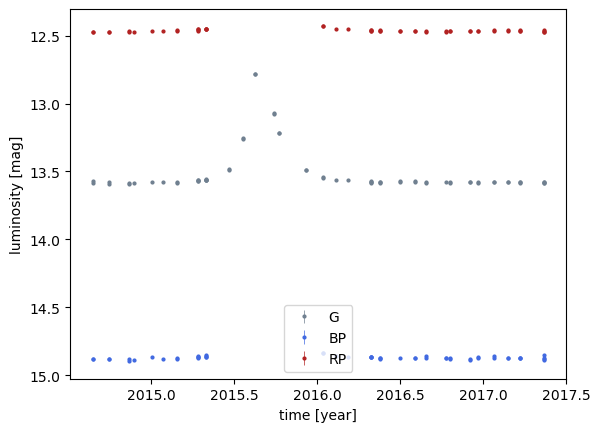

In [10]:
event.plot_photometry()

Separate photometry for one band can be obtained:

In [11]:
event.band_photometry("G").head()

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id,time_year,mag_err
0,6059400613544951552,16677568339403789,G,1698.447455,13.581720,69543.851351,92.815028,749.273621,False,False,4097,375316653866487564,2014.650096,0.001229
1,6059400613544951552,16681660631794030,G,1698.521430,13.570018,70297.436761,121.972755,576.337219,False,False,4198401,375316653866487564,2014.650298,0.001598
2,6059400613544951552,18605508130787484,G,1733.311698,13.590165,69005.035717,91.666889,752.780396,False,False,4097,375316653866487564,2014.745549,0.001224
3,6059400613544951552,18609600412565873,G,1733.385675,13.580008,69653.568362,137.222199,507.596954,False,False,4198401,375316653866487564,2014.745751,0.001814
4,6059400613544951552,21062536978253010,G,1777.745475,13.589119,69071.545138,76.789981,899.486389,False,False,4194433,375316653866487564,2014.867202,0.001024


as well as plotted:

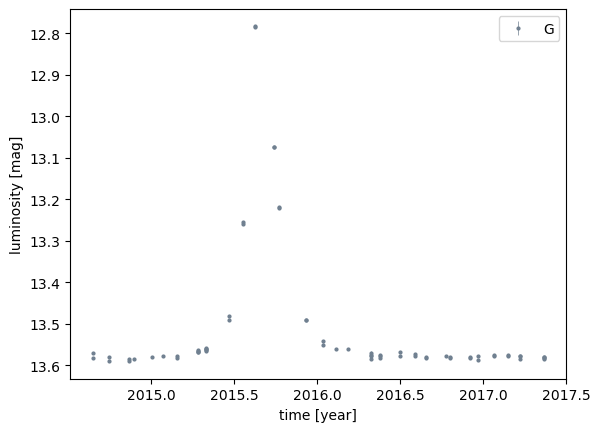

In [12]:
event.plot_photometry(bands=["G"])